# Principal Component Analysis
Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [4]:
# Read Data from Sklearn
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer.values()

dict_values([array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       

In [8]:
cancer["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [53]:
df=pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
"target" in df.columns

False

 # PCA Visualization
* As we've noticed before it is difficult to visualize high dimensional data, 
* we can use PCA to find the first two principal components,\
* and visualize the data in this new, two-dimensional space, with a single scatter-plot. \
* Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [56]:
# Use the Standard Scaler for Standardization
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
df=scaler.fit_transform(df)
df.shape

(569, 30)

# Fit and Transform in PCA
* PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn.
* We instantiate a PCA object, find the principal components using the fit method
* then apply the rotation and dimensionality reduction by calling transform().

* We can also specify how many components we want to keep when creating the PCA object. 

In [20]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=2)

In [59]:
df_pca=pca.fit_transform(df)
df_pca.shape   #  # 30 dimensions have been reduced to 2 dimensions

(569, 2)

In [60]:
df_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

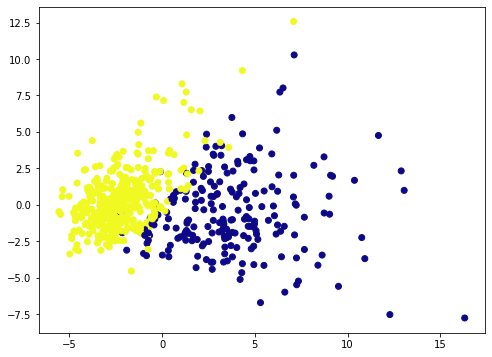

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1], c=cancer["target"],cmap="plasma")
plt.show()

# Interpreting the Components
* Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

* The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

* In this numpy matrix array, each row represents a principal component,
* and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [62]:
pca.components_  # You  each component have 30 features

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [63]:
pca.n_features_

30

In [64]:
pca.get_covariance()

array([[ 1.30339149,  0.36723765,  0.9101011 ,  0.91133853,  0.1720027 ,
         0.487748  ,  0.65560648,  0.78035589,  0.15424669, -0.27303781,
         0.71311887, -0.06241504,  0.70825606,  0.76233913, -0.2126399 ,
         0.19274351,  0.18932195,  0.35662708, -0.1080577 , -0.05773542,
         0.91721359,  0.3516714 ,  0.91683402,  0.90774026,  0.14777339,
         0.41555337,  0.52494977,  0.7192851 ,  0.17126094,  0.03073   ],
       [ 0.36723765,  0.55233517,  0.37288341,  0.36915886,  0.1319764 ,
         0.27230792,  0.32696925,  0.36033416,  0.12471167, -0.02995897,
         0.30927747, -0.00517176,  0.3113383 ,  0.31992372, -0.04531459,
         0.15444314,  0.14319176,  0.20432777, -0.0013415 ,  0.04860503,
         0.37498299,  0.15430477,  0.38022397,  0.37063369,  0.11675063,
         0.23584869,  0.27531017,  0.33858614,  0.11962962,  0.0892345 ],
       [ 0.9101011 ,  0.37288341,  1.30865653,  0.91307312,  0.20634419,
         0.52947746,  0.69037593,  0.80599007,  0

In [65]:
pca.get_precision()

array([[ 2.28786017e+00, -8.87893411e-02, -2.41235169e-01,
        -2.46483010e-01,  2.59164206e-02, -4.50272605e-02,
        -1.05929170e-01, -1.59629422e-01,  3.06347490e-02,
         1.67604792e-01, -1.69139720e-01,  4.02630224e-02,
        -1.63138276e-01, -1.93254870e-01,  1.04970993e-01,
         3.66598085e-02,  2.61151327e-02, -2.68486834e-02,
         7.85568776e-02,  9.93174340e-02, -2.44067450e-01,
        -8.13340422e-02, -2.37692568e-01, -2.42100436e-01,
         2.61782465e-02, -3.38900205e-02, -6.91189506e-02,
        -1.39635574e-01,  1.21113007e-02,  8.09652058e-02],
       [-8.87893411e-02,  2.49987775e+00, -8.83614490e-02,
        -8.89315186e-02, -1.01601510e-02, -3.96498459e-02,
        -5.74477740e-02, -7.14466395e-02, -8.43514217e-03,
         3.52183084e-02, -6.74182120e-02,  8.22900250e-03,
        -6.65151187e-02, -7.32092369e-02,  2.50904075e-02,
        -1.06886010e-02, -1.14036714e-02, -2.84353372e-02,
         1.50560683e-02,  1.32887198e-02, -8.91386044e-

In [66]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

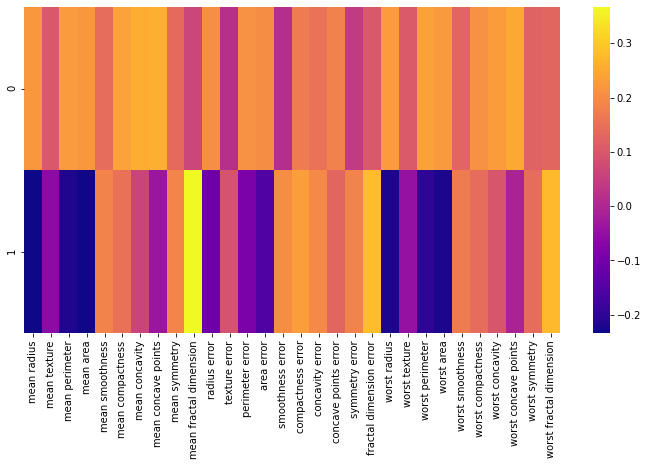

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [ ]:
# After use any classification algorithm to classify the data